**IMPORT ALL PACKAGES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
%ls

 balls_yolov4tiny/  'Colab Notebooks'/   dataset/   project/           yolov5/
 balls_yolov5/       darknet/            i2v/      'rgpv card_1.jpg'   yolov8/


In [ ]:
%cd i2v

/content/drive/MyDrive/i2v


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from tensorflow import keras
from tensorflow.keras import metrics

In [ ]:
IMAGE_SIZE = [180, 180]
train_path = '/content/drive/MyDrive/dataset/train'   #change with your path of train
valid_path = '/content/drive/MyDrive/dataset/val'     #change with your path of test

In [ ]:
#download model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    #layer.trainable = True
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/dataset/train*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(27, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
#Model Compilation
model.compile(
  loss='categorical_crossentropy',
  metrics=[
    keras.metrics.Precision(name='precision'),
    'accuracy',
    keras.metrics.Recall(name='recall'),
  ],
  optimizer='adam'
)

In [ ]:
#Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Preprocessing
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (180, 180),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 3359 images belonging to 27 classes.


In [ ]:
#Preprocessing
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/val',
                                            target_size = (180, 180),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 359 images belonging to 27 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=200,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/200
210/210 [==============================] - 839s 4s/step - loss: 3.4351 - precision: 0.7385 - accuracy: 0.7288 - recall: 0.7264 - val_loss: 1.4750 - val_precision: 0.8543 - val_accuracy: 0.8496 - val_recall: 0.8496
Epoch 2/200
210/210 [==============================] - 35s 168ms/step - loss: 1.2971 - precision: 0.8903 - accuracy: 0.8875 - recall: 0.8872 - val_loss: 1.8596 - val_precision: 0.8708 - val_accuracy: 0.8635 - val_recall: 0.8635
Epoch 3/200
210/210 [==============================] - 34s 164ms/step - loss: 1.0390 - precision: 0.9130 - accuracy: 0.9128 - recall: 0.9125 - val_loss: 1.9922 - val_precision: 0.8858 - val_accuracy: 0.8858 - val_recall: 0.8858
Epoch 4/200
210/210 [==============================] - 36s 171ms/step - loss: 0.7743 - precision: 0.9329 - accuracy: 0.9318 - recall: 0.9312 - val_loss: 2.3822 - val_precision: 0.8774 - val_accuracy: 0.8774 - val_recall: 0.8774
Epoch 5/200
210/210 [==============================] - 34s 162ms/step - loss: 0.8995 - pre

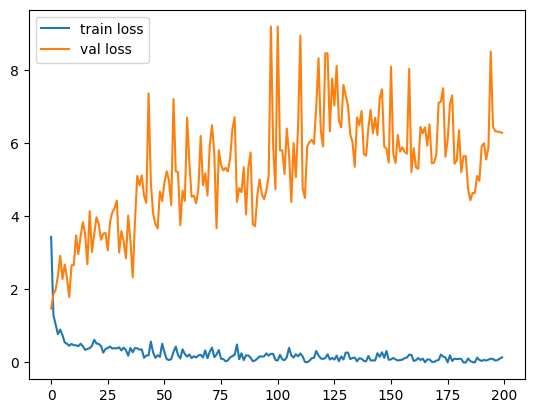

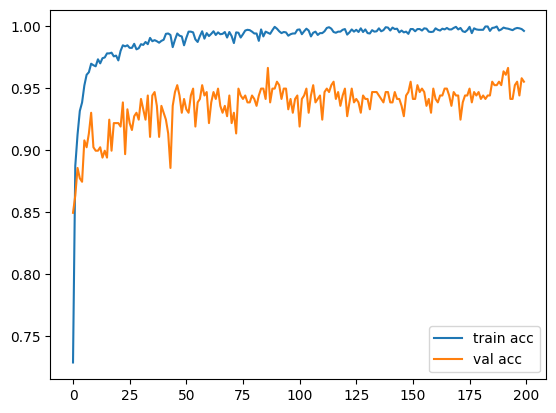

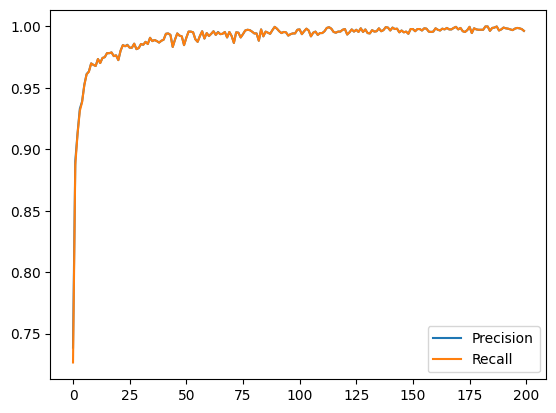

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualizing loss of test and train
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
print()
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

plt.plot(r.history['precision'], label='Precision')
print()
plt.plot(r.history['recall'], label='Recall')
plt.legend()
plt.show()
plt.savefig('prec_rec')


In [ ]:
#saving model
from tensorflow.keras.models import load_model

model.save('i2v_model.h5')

In [ ]:
#evaluating model with respect to train
model.evaluate(training_set)

210/210 [==============================] - 34s 159ms/step - loss: 0.0411 - precision: 0.9979 - accuracy: 0.9979 - recall: 0.9979


[0.041070155799388885, 0.997916042804718, 0.997916042804718, 0.997916042804718]

In [ ]:
#evaluating model with respect to test
model.evaluate(test_set)

23/23 [==============================] - 1s 44ms/step - loss: 6.2834 - precision: 0.9554 - accuracy: 0.9554 - recall: 0.9554


[6.283439636230469, 0.9554317593574524, 0.9554317593574524, 0.9554317593574524]

In [ ]:
pred_X = model.predict(training_set)
pred_X

210/210 [==============================] - 35s 162ms/step


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
pred_Y = model.predict(test_set)
pred_Y

23/23 [==============================] - 1s 40ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Thank you**